<a href="https://colab.research.google.com/github/jrg94/CSE5522/blob/lab1/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1.0**: Set up the environment. 

In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

**1.1** Read the data from GitHub into a pandas dataframe. 

In [0]:
micro_rna_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/miRScore-x.csv'
micro_rna_dataframe = pd.read_csv(micro_rna_data_url, index_col=0) # Removes the index column
mrna_well_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-well-explained.csv'
mrna_well_dataframe = pd.read_csv(mrna_well_data_url, index_col=0, header=None, skiprows=1).T
mrna_poor_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/mRNA-y-poor-explained.csv'
mrna_poor_dataframe = pd.read_csv(mrna_poor_data_url, index_col=0, header=None, skiprows=1).T
tissue_types_data_url = 'https://raw.githubusercontent.com/efosler/cse5522data/master/cancerType-x-Categorical.csv'
tissue_types_dataframe = pd.read_csv(tissue_types_data_url)

**1.2** Print out the top of the dataframe to make sure that the data loaded correctly.

In [139]:
micro_rna_dataframe.head()

,MIRC1,MIRC2,MIRC3,MIRC4,MIRC5,MIRC6,MIRC7,MIRC8,MIRC9,MIRC10,MIRC11,MIRC12,MIRC13,MIRC14,MIRC15,MIRC16,MIRC17,MIRC18,MIRC19,MIRC20,MIRC21
1,5.453767,4.383828,3.216983,3.428224,7.308519,5.509137,5.515894,3.371819,6.036913,2.876100,8.064057,3.388470,3.931960,6.401138,6.571827,3.785073,5.201207,2.575824,3.977328,5.501027,4.756962
2,4.321988,3.986583,3.829885,4.502739,1.685509,5.206405,6.445237,3.465323,6.618933,2.851471,7.730359,2.738890,3.567882,4.360902,6.082557,3.343985,6.303041,3.140004,4.199990,5.224254,4.429511
3,4.089116,4.178590,3.393789,3.582799,8.103207,4.997112,5.359251,3.681484,6.373393,2.851890,8.934644,2.892689,3.132659,6.555559,6.559177,3.469511,5.373332,4.424949,3.138479,5.682007,4.403253
4,4.884692,4.061140,3.475111,4.017083,8.005837,5.491073,5.014364,4.300977,6.017040,2.834699,8.646215,3.163199,3.531044,6.908134,6.624755,3.833247,5.495557,4.954630,4.542415,5.469924,4.693171
5,4.053976,4.224208,3.801616,3.329253,9.208897,5.518924,5.534329,2.391842,6.183707,3.029387,7.351146,2.873874,3.305899,6.917566,6.138030,3.250404,5.502236,4.572714,2.677879,5.577007,4.290140


In [140]:
mrna_well_dataframe.head()

,SNORD88B,GRHL2,C1orf172,RAB25,ANKS4B,HNF4A,AP1M2,PKP3,STMN4,ESRP1,CDHR5,MEG3,PRSS8,OVOL2,SPINT1,TM4SF5,ELAVL3,FAM123A,ZDHHC22,MMD2,SH2D3A,C21orf131,NCAN,CRB3,CLDN4,CACNG7,C1orf210,KCNJ9,CLDN7,ATCAY,C2orf80,ATP6V1G2,ST14,SHISA7,ELF3
1,3.321928,3.389608,5.822470,3.389608,3.321928,3.321928,4.820266,3.321928,3.516129,4.744742,11.026446,13.639151,3.454255,3.454255,6.383480,3.321928,3.791033,3.389608,3.516129,3.887827,3.575458,3.321928,3.389608,3.933894,5.313939,3.321928,3.321928,3.321928,5.398508,3.840242,3.321928,5.547879,6.207130,3.454255,3.575458
2,3.321928,3.586549,3.586549,3.486444,3.321928,4.813443,3.634105,3.634105,3.433667,3.724759,11.313428,4.108299,9.012650,3.321928,7.532506,3.321928,3.378872,3.378872,3.433667,4.541440,5.285010,3.321928,3.486444,4.074223,6.461239,3.586549,3.321928,3.433667,5.254900,3.586549,3.321928,4.237097,6.810804,3.586549,4.003557
3,3.321928,3.938521,3.993221,3.321928,3.321928,3.938521,3.404971,3.557961,3.483493,3.557961,3.483493,13.089396,4.369124,3.404971,4.239367,3.321928,4.193385,3.321928,3.760753,3.938521,5.172736,3.321928,3.483493,3.760753,9.293219,3.404971,3.404971,3.483493,4.856000,3.557961,3.321928,5.635110,5.812894,3.938521,4.369124
4,3.321928,3.794208,4.985892,3.321928,3.623375,3.711319,3.529721,3.946937,3.872592,5.695660,3.623375,15.672826,3.794208,3.711319,6.619172,3.321928,6.810524,3.429562,5.436545,6.056265,6.970559,3.321928,4.381581,3.711319,5.717062,5.511952,3.429562,3.429562,5.462121,5.969756,3.321928,6.450540,6.537319,4.534068,5.511952
5,3.321928,3.321928,11.037026,3.400388,3.400388,6.225495,3.400388,3.321928,3.400388,3.321928,7.825508,14.555980,5.900582,3.321928,7.980390,3.321928,4.939118,3.321928,3.400388,4.912592,5.266850,3.321928,3.739103,6.159351,4.200292,3.321928,3.321928,3.321928,5.568135,3.321928,3.321928,3.677429,6.029603,3.321928,3.545548


In [141]:
mrna_poor_dataframe.head()

,NOBOX,SCGB1D4,RPL9,SPATA8,C2orf78,FAM138B,LCE3C,POU5F2,OR2D3,PABPC1P2,CATSPER4,FTHL17,OR5K1,SNORA3,IL13,C10orf122,SULT1C3,KRT38,TMPRSS12,C4orf11
1,3.321928,3.321928,7.556077,3.321928,3.321928,3.321928,3.321928,3.389608,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928
2,3.321928,3.321928,8.111351,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.586549,3.321928,3.321928,3.321928,3.321928,3.321928
3,3.321928,3.321928,8.297134,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.404971,3.404971,3.321928,3.321928,3.321928,3.993221,3.321928,3.321928,3.321928,3.321928,3.321928
4,3.321928,3.321928,8.482979,3.321928,3.529721,3.321928,3.321928,3.429562,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,6.718019,3.321928,3.321928,3.321928,3.321928,3.321928
5,3.321928,3.321928,11.794430,3.400388,3.321928,3.321928,3.321928,3.400388,3.321928,3.400388,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928


In [142]:
tissue_types_dataframe.head()

,Unnamed: 0,cancerType
0,1,ACC
1,2,ACC
2,3,ACC
3,4,ACC
4,5,ACC


**1.3** Explore data shape

In [143]:
micro_rna_dataframe.shape

(8895, 21)

In [144]:
mrna_well_dataframe.shape

(8895, 35)

In [145]:
mrna_poor_dataframe.shape

(8895, 20)

In [146]:
tissue_types_dataframe.shape

(8895, 2)

**1.4** Explore data description

In [147]:
micro_rna_dataframe.describe()

,MIRC1,MIRC2,MIRC3,MIRC4,MIRC5,MIRC6,MIRC7,MIRC8,MIRC9,MIRC10,MIRC11,MIRC12,MIRC13,MIRC14,MIRC15,MIRC16,MIRC17,MIRC18,MIRC19,MIRC20,MIRC21
count,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000
mean,4.129920,4.765170,5.057100,4.097146,2.846338,4.797431,5.383079,3.425811,4.792121,3.453612,7.859492,2.851375,3.649230,4.651203,4.903554,4.026922,6.893040,5.199461,7.382938,5.445934,4.740501
std,1.099592,0.828207,0.987020,0.835212,1.521580,0.799616,0.874974,0.875548,0.977154,0.773364,0.882516,0.617543,0.837230,1.257902,0.913718,0.711169,1.036150,2.423279,2.677375,0.824836,0.775925
min,0.668085,1.305794,2.193773,0.728425,0.073645,2.380204,2.716960,1.086365,0.879080,1.117544,4.459917,0.899994,0.435114,0.672520,2.212343,1.447088,2.643597,1.193575,0.530771,1.428634,2.218998
25%,3.390396,4.331190,4.376916,3.567006,1.926821,4.272392,4.758908,2.866235,4.276781,2.910465,7.288990,2.447650,3.222392,3.737002,4.303779,3.517319,6.447339,3.579986,5.268867,5.119781,4.247824
50%,4.139365,4.829788,5.103757,4.090588,2.623955,4.695558,5.374751,3.242166,4.791324,3.379283,7.801186,2.822985,3.677365,4.569216,4.744346,3.947587,7.133301,4.226871,8.475008,5.482303,4.651004
75%,4.913180,5.327773,5.694544,4.596960,3.370140,5.217066,5.983875,3.750545,5.426297,3.904954,8.343808,3.220396,4.154977,5.542658,5.277193,4.510465,7.590129,5.691993,9.415745,5.900317,5.122929
max,7.923561,6.974327,8.134850,7.393546,9.563560,8.406599,8.029896,7.569143,8.414998,6.977404,11.898551,5.590978,6.459934,10.067625,8.956072,6.734989,9.154822,12.814622,12.092160,7.651443,7.945005


In [148]:
mrna_well_dataframe.describe()

,SNORD88B,GRHL2,C1orf172,RAB25,ANKS4B,HNF4A,AP1M2,PKP3,STMN4,ESRP1,CDHR5,MEG3,PRSS8,OVOL2,SPINT1,TM4SF5,ELAVL3,FAM123A,ZDHHC22,MMD2,SH2D3A,C21orf131,NCAN,CRB3,CLDN4,CACNG7,C1orf210,KCNJ9,CLDN7,ATCAY,C2orf80,ATP6V1G2,ST14,SHISA7,ELF3
count,8.895000e+03,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000,8895.000000
mean,3.321928e+00,8.155817,7.593661,8.785721,4.627285,5.378231,8.976169,8.860184,4.044450,9.361552,5.359268,6.365150,9.773930,6.348790,10.782612,4.534172,4.239040,3.894851,4.056129,3.704895,7.709817,3.585181,4.240817,7.642334,10.707382,3.914341,7.076422,3.824674,9.725093,4.468322,3.601279,5.252473,11.016779,4.015498,10.302955
std,3.286445e-13,3.178686,2.162151,3.414385,2.251971,3.201652,3.026656,3.212414,1.939588,3.152476,3.170327,2.448115,3.333205,2.019891,2.696889,2.391540,2.039951,1.627266,1.935259,1.385978,2.042799,1.061898,2.478874,2.121472,3.465986,1.798836,2.144705,1.398936,2.856072,2.449587,1.044203,1.856013,2.539577,1.584956,3.407289
min,3.321928e+00,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.321928,3.456596,3.321928,3.321928
25%,3.321928e+00,3.827169,6.568491,4.138856,3.321928,3.321928,7.390474,5.492842,3.321928,7.868540,3.420213,4.570809,8.432295,3.791871,10.121418,3.321928,3.321928,3.321928,3.321928,3.321928,6.649594,3.321928,3.321928,7.091705,8.336141,3.321928,5.705131,3.321928,8.154926,3.321928,3.321928,4.087904,9.768306,3.380293,8.762381
50%,3.321928e+00,9.721445,8.584962,10.578029,3.380397,3.487615,10.362406,10.032601,3.382280,10.825702,3.616934,5.775633,11.172563,7.065259,11.868456,3.321928,3.434668,3.321928,3.398610,3.321928,8.352049,3.321928,3.445316,8.492150,12.129232,3.321928,7.871400,3.399144,10.862832,3.401125,3.321928,4.682478,11.992357,3.487332,11.465436
75%,3.321928e+00,10.602422,9.106035,11.346711,4.613274,6.889222,11.159029,11.314739,3.548504,11.592149,5.771523,7.415182,12.132662,7.976795,12.536744,3.958196,3.806989,3.466366,3.599824,3.321928,9.185166,3.321928,3.667188,9.067013,13.256996,3.391637,8.679830,3.539184,11.819972,3.889011,3.321928,5.645023,12.805950,3.726068,12.869153
max,3.321928e+00,13.214960,11.400681,13.952766,11.334583,14.143314,14.195280,15.187468,13.293996,13.750252,16.494252,16.003397,16.222350,10.315371,15.279120,15.933825,13.872720,11.958680,13.540386,11.930154,11.773909,10.807282,17.157491,11.553039,16.765540,11.635063,11.841375,11.694423,14.485464,14.530785,10.079880,13.195618,15.532057,11.369453,15.908748


**1.5** Import linear regression library from scikit. Borrowed parts of the analysis from an article written by [Nagesh Singh Chauhan](https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f).

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 
from sklearn import metrics

**1.6** Setup x (microRNA features) and y (mRNA targets) values for regression. *Proof of concept*: let's try a single target value for now (SNORD88B).

In [150]:
x = micro_rna_dataframe.values
print(f'Micro RNA Features:\n {x}')
y = mrna_well_dataframe["SNORD88B"].values
print(f'mRNA Target Value SNORD88B:\n {y}')

Micro RNA Features:
 [[5.45376694 4.3838276  3.2169834  ... 3.97732759 5.50102704 4.75696249]
 [4.32198812 3.98658259 3.82988503 ... 4.19998992 5.22425381 4.42951072]
 [4.08911559 4.17859005 3.39378873 ... 3.1384791  5.68200738 4.40325252]
 ...
 [3.02645513 4.1710086  4.45773238 ... 2.69657029 4.73838707 5.70546468]
 [2.72775755 4.33952219 4.56746271 ... 3.01168894 5.60531597 5.87649015]
 [2.41979846 4.25275134 4.75874578 ... 2.74892305 5.13766053 6.12771056]]
mRNA Target Value SNORD88B:
 [3.32192809 3.32192809 3.32192809 ... 3.32192809 3.32192809 3.32192809]


**1.7** Split data 80/20 and run linear regression.

In [151]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
r = LinearRegression()  
r.fit(x_train, y_train)
y_prediction = r.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_prediction})
df.head()

,Actual,Predicted
0,3.321928,3.321928
1,3.321928,3.321928
2,3.321928,3.321928
3,3.321928,3.321928
4,3.321928,3.321928


**1.8** Let's take a look at some of the metrics. In particular, R2 and RMSE.

In [152]:
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
r2 = metrics.r2_score(y_test, y_prediction)
print(f'RMSE: {rmse}; R2: {r2}') # Notice how error is essentially zero, so we have a perfect prediciton

RMSE: 0.0; R2: 1.0


**1.9** Turns out SNORD88B is extremely stable. In other words, it's fairly easy to predict regardless of which features we choose. Let's try creating an experiment for all target values.



In [0]:
def experiment(column_name, data_frame):
  rmse_list = []
  r2_list = []
  for _ in range(10):
    y = data_frame[column].values
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
    r = LinearRegression()  
    r.fit(x_train, y_train)
    y_prediction = r.predict(x_test)
    rmse = np.sqrt(metrics.mean_squared_error(y_test, y_prediction))
    rmse_list.append(rmse)
    r2 = metrics.r2_score(y_test, y_prediction)
    r2_list.append(r2)
  return {
      "rmse_avg": np.average(rmse_list),
      "rmse_std": np.std(rmse_list), 
      "r2_avg": np.average(r2_list),
      "r2_std": np.std(r2_list)
  }

**1.10** Great! Now, we can quickly iterate over every column and report the average mean and rmse.

In [154]:
well_error = {}
for column in mrna_well_dataframe:
  error = experiment(column, mrna_well_dataframe)
  well_error[column] = error
  print(f'{column}: {error}')

SNORD88B: {'rmse_avg': 0.0, 'rmse_std': 0.0, 'r2_avg': 1.0, 'r2_std': 0.0}
GRHL2: {'rmse_avg': 1.056437334194678, 'rmse_std': 0.0266543017069344, 'r2_avg': 0.8897806734737536, 'r2_std': 0.005129015249028102}
C1orf172: {'rmse_avg': 0.7551834055349196, 'rmse_std': 0.017558812811523345, 'r2_avg': 0.8765345573629661, 'r2_std': 0.006158834750165544}
RAB25: {'rmse_avg': 1.2170884874708299, 'rmse_std': 0.023300755155591202, 'r2_avg': 0.8730593425783335, 'r2_std': 0.005626915996368981}
ANKS4B: {'rmse_avg': 0.8309852079207536, 'rmse_std': 0.023715402573778077, 'r2_avg': 0.863900199768271, 'r2_std': 0.010358489363912825}
HNF4A: {'rmse_avg': 1.1980336879967894, 'rmse_std': 0.025222161956039275, 'r2_avg': 0.8585886725476174, 'r2_std': 0.008227386735129865}
AP1M2: {'rmse_avg': 1.1776601898170793, 'rmse_std': 0.042284255464004, 'r2_avg': 0.847352294900308, 'r2_std': 0.01129403710975454}
PKP3: {'rmse_avg': 1.2731000595993252, 'rmse_std': 0.019927832517581737, 'r2_avg': 0.8420983217192791, 'r2_std': 0

**1.11** Let's run the same experiment but for the poorly expressed genes.

In [155]:
poor_error = {}
for column in mrna_poor_dataframe:
  error = experiment(column, mrna_poor_dataframe)
  poor_error[column] = error
  print(f'{column}: {error}')

NOBOX: {'rmse_avg': 0.3491666850486756, 'rmse_std': 0.053746204523226135, 'r2_avg': 0.0439152695685874, 'r2_std': 0.013358967632662921}
SCGB1D4: {'rmse_avg': 0.4060720377610486, 'rmse_std': 0.06010530351060449, 'r2_avg': 0.04784092693763973, 'r2_std': 0.01333909622659798}
RPL9: {'rmse_avg': 1.7622874652736757, 'rmse_std': 0.015360714528704364, 'r2_avg': 0.03872797335333383, 'r2_std': 0.006472339849727053}
SPATA8: {'rmse_avg': 0.21823866313119805, 'rmse_std': 0.03304118027842327, 'r2_avg': 0.049204606732042265, 'r2_std': 0.010011644419923056}
C2orf78: {'rmse_avg': 0.15616283358165137, 'rmse_std': 0.03132720954592942, 'r2_avg': 0.06104448098813521, 'r2_std': 0.027907291719040425}
FAM138B: {'rmse_avg': 0.07383904024729933, 'rmse_std': 0.009247097009435368, 'r2_avg': 0.042877487043671766, 'r2_std': 0.012448108934760194}
LCE3C: {'rmse_avg': 0.2986849764921781, 'rmse_std': 0.030522950186873243, 'r2_avg': 0.04305419765122279, 'r2_std': 0.01477136460632964}
POU5F2: {'rmse_avg': 0.1337323880822

**1.12** Time to visualize the error between the two target sets.

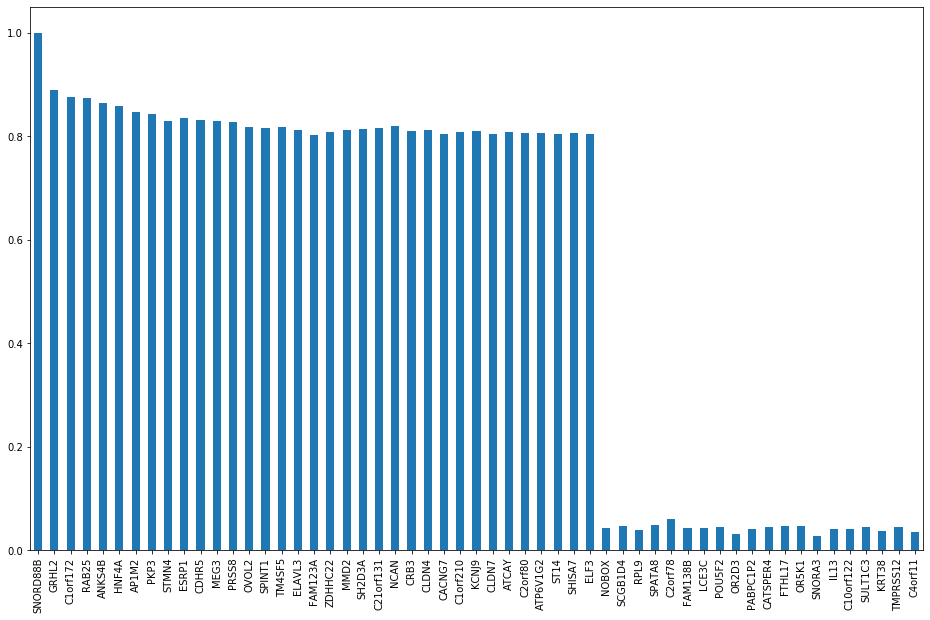

In [156]:
well_r2_dataframe = pd.DataFrame.from_dict(well_error).T["r2_avg"]
poor_r2_dataframe = pd.DataFrame.from_dict(poor_error).T["r2_avg"]
r2_dataframe = well_r2_dataframe.append(poor_r2_dataframe)
r2_dataframe.plot(kind='bar',figsize=(16,10))

Here, we can see that the R<sup>2</sup> value for the well expressed genes is much higher than the poorly expressed genes. In other words, the 21 features more clearly fit the well expressed genes on average. 

